<a href="https://colab.research.google.com/github/kirtiabhi-a11y/AI-BOOTCAMP-NIELIT/blob/main/linear_regression_kirti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Shape of data: (506, 14)
📉 Mean Squared Error (MSE): 24.291119474973478


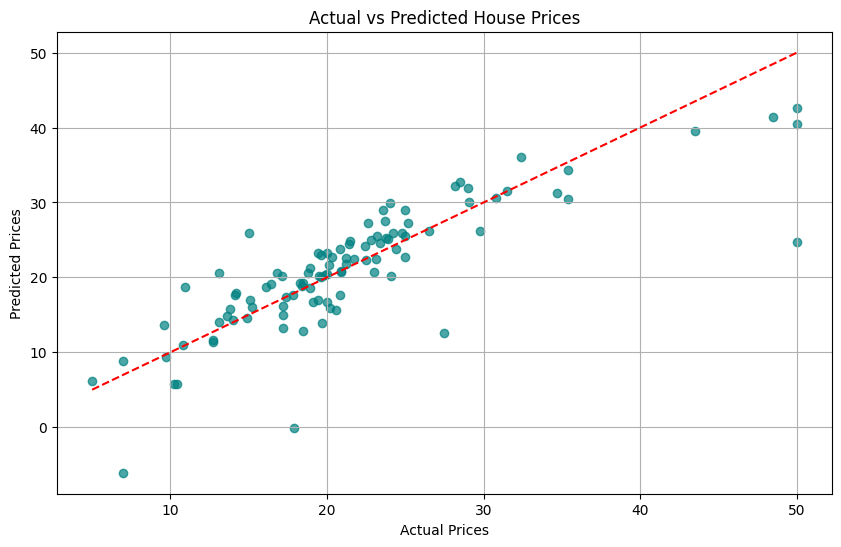

In [4]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Load the dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
data = boston.frame

# Optional: View dataset info
print(data.head())
print("Shape of data:", data.shape)

# Step 3: Define features (X) and target (y)
X = data.drop(columns='MEDV')
y = data['MEDV']

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4.1: Convert non-numeric columns to numeric
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
for col in X_test.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Handle potential NaNs after conversion (e.g., fill with mean or median)
# For simplicity, we'll fill with the mean of the respective training column
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("📉 Mean Squared Error (MSE):", mse)

# Step 8: (Optional) Visualize Predictions vs Actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid()
plt.show()